In [1]:
import tensorflow as tf
x = tf.ones(shape=(2, 1))  #tf.ones ALL1
print(x)
x = tf.zeros(shape=(2, 1))
print(x)

tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)
tf.Tensor(
[[0.]
 [0.]], shape=(2, 1), dtype=float32)


In [2]:
x = tf.random.normal(shape=(3, 1), mean=0., stddev=1.) #平均0.。。。 標準差1.。。。
print(x)
x = tf.random.uniform(shape=(3, 1), minval=0., maxval=1.) #Between 0~1
print(x)

tf.Tensor(
[[-0.27186346]
 [-0.4537147 ]
 [-1.0136318 ]], shape=(3, 1), dtype=float32)
tf.Tensor(
[[0.5411302]
 [0.7989584]
 [0.6695353]], shape=(3, 1), dtype=float32)


In [3]:
import numpy as np
x = np.ones(shape=(2, 2))
x[0, 0] = 0.

In [4]:
v = tf.Variable(initial_value=tf.random.normal(shape=(3, 1)))
print(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[-0.7657615],
       [-0.7888453],
       [-0.7984747]], dtype=float32)>


In [5]:
v.assign(tf.ones((3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>

In [6]:
v[0, 0].assign(3.)

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[3.],
       [1.],
       [1.]], dtype=float32)>

In [7]:
v.assign_add(tf.ones((3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[4.],
       [2.],
       [2.]], dtype=float32)>

In [8]:
a = tf.ones((2, 2))
b = tf.square(a)
c = tf.sqrt(a)
d = b + c
e = tf.matmul(a, b) #matrix 相乘
e *= d

In [9]:
input_var = tf.Variable(initial_value=3.)
with tf.GradientTape() as tape: #GradientTape 梯度帶
   result = tf.square(input_var)
gradient = tape.gradient(result, input_var)

In [10]:
input_const = tf.constant(3.)
with tf.GradientTape() as tape:
   tape.watch(input_const)
   result = tf.square(input_const)
gradient = tape.gradient(result, input_const)

In [11]:
time = tf.Variable(0.)
with tf.GradientTape() as outer_tape:
    with tf.GradientTape() as inner_tape:
        position =  4.9 * time ** 2
    speed = inner_tape.gradient(position, time)
acceleration = outer_tape.gradient(speed, time)

In [12]:
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(
    mean=[0, 3],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)
positive_samples = np.random.multivariate_normal(
    mean=[3, 0],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)

In [13]:
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"),
                     np.ones((num_samples_per_class, 1), dtype="float32")))

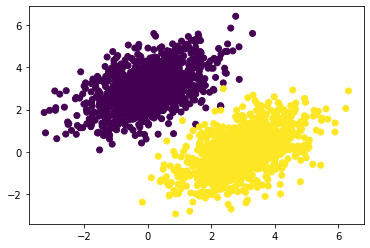

In [14]:
import matplotlib.pyplot as plt
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

In [15]:
input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

In [16]:
def model(inputs):
    return tf.matmul(inputs, W) + b
def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)
    return tf.reduce_mean(per_sample_losses)

In [17]:
learning_rate = 0.1
def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(targets, predictions)
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
    W.assign_sub(grad_loss_wrt_W * learning_rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    return loss

In [18]:
for step in range(40):
    loss = training_step(inputs, targets)
    print(f"Loss at step {step}: {loss:.4f}")

Loss at step 0: 1.1128
Loss at step 1: 0.2253
Loss at step 2: 0.1226
Loss at step 3: 0.1034
Loss at step 4: 0.0952
Loss at step 5: 0.0889
Loss at step 6: 0.0832
Loss at step 7: 0.0781
Loss at step 8: 0.0735
Loss at step 9: 0.0692
Loss at step 10: 0.0653
Loss at step 11: 0.0618
Loss at step 12: 0.0585
Loss at step 13: 0.0556
Loss at step 14: 0.0529
Loss at step 15: 0.0504
Loss at step 16: 0.0481
Loss at step 17: 0.0461
Loss at step 18: 0.0442
Loss at step 19: 0.0425
Loss at step 20: 0.0409
Loss at step 21: 0.0395
Loss at step 22: 0.0382
Loss at step 23: 0.0370
Loss at step 24: 0.0359
Loss at step 25: 0.0349
Loss at step 26: 0.0340
Loss at step 27: 0.0332
Loss at step 28: 0.0324
Loss at step 29: 0.0317
Loss at step 30: 0.0311
Loss at step 31: 0.0305
Loss at step 32: 0.0300
Loss at step 33: 0.0295
Loss at step 34: 0.0291
Loss at step 35: 0.0287
Loss at step 36: 0.0283
Loss at step 37: 0.0280
Loss at step 38: 0.0277
Loss at step 39: 0.0274


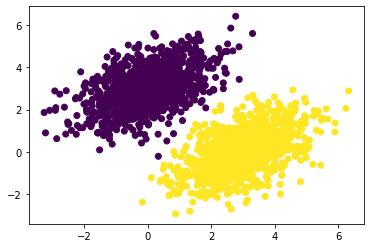

In [19]:
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

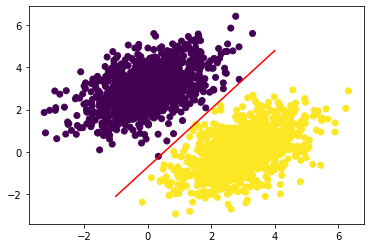

In [20]:
x = np.linspace(-1, 4, 100)
y = - W[0] /  W[1] * x + (0.5 - b) / W[1]
plt.plot(x, y, "-r")
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)

In [21]:
from tensorflow import keras

class SimpleDense(keras.layers.Layer):

    def __init__(self, units, activation=None):
        super().__init__()
        self.units = units
        self.activation = activation

    def build(self, input_shape):
        input_dim = input_shape[-1]
        self.W = self.add_weight(shape=(input_dim, self.units),
                                 initializer="random_normal")
        self.b = self.add_weight(shape=(self.units,),
                                 initializer="zeros")

    def call(self, inputs):
        y = tf.matmul(inputs, self.W) + self.b
        if self.activation is not None:
            y = self.activation(y)
        return y

In [22]:
my_dense = SimpleDense(units=32, activation=tf.nn.relu)
input_tensor = tf.ones(shape=(2, 784))
output_tensor = my_dense(input_tensor)
print(output_tensor.shape)

(2, 32)


In [23]:
from tensorflow.keras import layers
layer = layers.Dense(32, activation="relu")
from tensorflow.keras import models
from tensorflow.keras import layers
model = models.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(32)
])

In [24]:
model = keras.Sequential([
    SimpleDense(32, activation="relu"),
    SimpleDense(64, activation="relu"),
    SimpleDense(32, activation="relu"),
    SimpleDense(10, activation="softmax")
])

In [25]:
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer="rmsprop",
              loss="mean_squared_error",
              metrics=["accuracy"])

In [26]:
model.compile(optimizer=keras.optimizers.RMSprop(),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.BinaryAccuracy()])

In [27]:
history = model.fit(
    inputs,
    targets,
    epochs=5,
    batch_size=128
)

Epoch 1/5
16/16 [==============================] - 0s 864us/step - loss: 7.9499 - binary_accuracy: 0.6390
Epoch 2/5
16/16 [==============================] - 0s 798us/step - loss: 7.5375 - binary_accuracy: 0.6430
Epoch 3/5
16/16 [==============================] - 0s 731us/step - loss: 7.1885 - binary_accuracy: 0.6495
Epoch 4/5
16/16 [==============================] - 0s 731us/step - loss: 6.8606 - binary_accuracy: 0.6570
Epoch 5/5
16/16 [==============================] - 0s 731us/step - loss: 6.5449 - binary_accuracy: 0.6625


In [28]:
history.history

{'loss': [7.949943542480469,
  7.537472724914551,
  7.188523292541504,
  6.860562324523926,
  6.544896602630615],
 'binary_accuracy': [0.6389999985694885,
  0.6430000066757202,
  0.6495000123977661,
  0.6570000052452087,
  0.6625000238418579]}

In [29]:
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.1),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.BinaryAccuracy()])

indices_permutation = np.random.permutation(len(inputs))
shuffled_inputs = inputs[indices_permutation]
shuffled_targets = targets[indices_permutation]

num_validation_samples = int(0.3 * len(inputs))
val_inputs = shuffled_inputs[:num_validation_samples]
val_targets = shuffled_targets[:num_validation_samples]
training_inputs = shuffled_inputs[num_validation_samples:]
training_targets = shuffled_targets[num_validation_samples:]
model.fit(
    training_inputs,
    training_targets,
    epochs=5,
    batch_size=16,
    validation_data=(val_inputs, val_targets)
)

Epoch 1/5
88/88 [==============================] - 0s 2ms/step - loss: 0.2548 - binary_accuracy: 0.9671 - val_loss: 0.1057 - val_binary_accuracy: 0.9250
Epoch 2/5
88/88 [==============================] - 0s 1ms/step - loss: 0.0694 - binary_accuracy: 0.9643 - val_loss: 0.1249 - val_binary_accuracy: 0.9400
Epoch 3/5
88/88 [==============================] - 0s 1ms/step - loss: 0.0740 - binary_accuracy: 0.9600 - val_loss: 0.0286 - val_binary_accuracy: 0.9983
Epoch 4/5
88/88 [==============================] - 0s 1ms/step - loss: 0.0673 - binary_accuracy: 0.9679 - val_loss: 0.1216 - val_binary_accuracy: 0.9767
Epoch 5/5
88/88 [==============================] - 0s 1ms/step - loss: 0.0743 - binary_accuracy: 0.9536 - val_loss: 0.2145 - val_binary_accuracy: 0.7750


In [30]:
predictions = model.predict(val_inputs, batch_size=128)
print(predictions[:10])

5/5 [==============================] - 0s 505us/step
[[-0.46092126]
 [-0.26789698]
 [-0.30818728]
 [-0.07610169]
 [ 0.400606  ]
 [-0.13605443]
 [-0.18762484]
 [ 0.5292024 ]
 [ 0.10013753]
 [-0.32244983]]


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


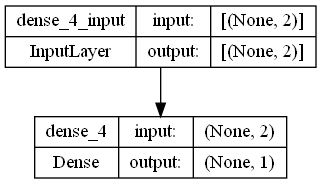

In [31]:
from tensorflow.keras.utils import plot_model
model.summary()

plot_model(model, 
    show_shapes= True,
    expand_nested=True
)